In [1]:
# line magic
%pylab inline 

import pandas as pd
import seaborn
import requests
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")
pd.options.display.float_format = '{:.2f}'.format

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('turnstile_180428.txt')

# 0.0.1.1. Challenge 1

* Open up a new IPython notebook
* Download a few MTA turnstile data files
* Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.


In [3]:
download = False

if download:
    dates = ['180526', '180519', '180512', '180505', '180428']
    
    mta_dfs = []
    
    for this_date in dates:
        url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{this_date}.txt'
        print(f'downloading {url}')
        
        mta_dfs.append(
            pd.read_csv(url)
        )

    df_mta = pd.concat(mta_dfs)
    df_mta.to_csv('turnstile_backup.csv')
else:
    df_mta = pd.read_csv('turnstile_backup.csv', index_col=0)

In [4]:
df_mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986343 entries, 0 to 197578
Data columns (total 11 columns):
C/A                                                                     986343 non-null object
UNIT                                                                    986343 non-null object
SCP                                                                     986343 non-null object
STATION                                                                 986343 non-null object
LINENAME                                                                986343 non-null object
DIVISION                                                                986343 non-null object
DATE                                                                    986343 non-null object
TIME                                                                    986343 non-null object
DESC                                                                    986343 non-null object
ENTRIES                           

In [5]:
# the dataframe has 986k rows, but only 197k indices... we need to reset the index column
df_mta.reset_index(inplace=True, drop=True)

In [6]:
df_mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
df_mta.columns = df_mta.columns.str.strip()
df_mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481


# Challenge 2

```
Challenge 2

    Let's turn this into a time series.

Create a new column that specifies the date and time of each entry.

You can convert the date and time into datetime objects -- 
That is a python class that represents a point in time. You 
can combine the date and time fields into a string and use 
the dateutil module to convert it into a datetime object. 
For an example check this StackOverflow question.

Also, check out this handy Pandas function.
```


In [9]:
df_mta['DATETIME_STR'] = df_mta['DATE'] + ' ' + df_mta['TIME']
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME_STR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,05/19/2018 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,05/19/2018 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,05/19/2018 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,05/19/2018 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,05/19/2018 16:00:00


In [10]:
df_mta['DATETIME'] = pd.to_datetime(df_mta['DATETIME_STR'], format="%m/%d/%Y %H:%M:%S")

In [11]:
df_mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986343 entries, 0 to 986342
Data columns (total 13 columns):
C/A             986343 non-null object
UNIT            986343 non-null object
SCP             986343 non-null object
STATION         986343 non-null object
LINENAME        986343 non-null object
DIVISION        986343 non-null object
DATE            986343 non-null object
TIME            986343 non-null object
DESC            986343 non-null object
ENTRIES         986343 non-null int64
EXITS           986343 non-null int64
DATETIME_STR    986343 non-null object
DATETIME        986343 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 97.8+ MB


In [12]:
df_mta.drop('DATETIME_STR', axis=1, inplace=True)

In [13]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00


 # Challenge 3

Challenge 3

    These counts are for every n hours. (What is n?) We want total daily entries.

Calculate to total daily entries for each turnstile.

Your result should be a new data frame that has the same keys, but now we have a 
single value for a single day, which is the total number of passengers that 
entered through this turnstile on this day.

### How many hours is an entry taken?
#### **Every 4 hours.**

In [14]:
# sort values to make sure everything is 
df_mta.sort_values(by=['STATION', 'UNIT', 'C/A', 'SCP', 'DATETIME'], inplace=True)
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
818872,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,00:00:00,REGULAR,13445687,15035545,2018-04-21 00:00:00
818873,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,04:00:00,REGULAR,13445820,15035824,2018-04-21 04:00:00
818874,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,08:00:00,REGULAR,13445902,15036137,2018-04-21 08:00:00
818875,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,12:00:00,REGULAR,13446424,15037068,2018-04-21 12:00:00
818876,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,16:00:00,REGULAR,13447216,15038424,2018-04-21 16:00:00


In [15]:
df_mta['ENTRY_DIFF'] = (df_mta.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES']
                        .diff(periods=-1)).abs()

In [16]:
df_mta['EXIT_DIFF'] = (df_mta.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS']
                        .diff(periods=-1)).abs()

In [17]:
# but there are some problems...
df_mta['ENTRY_DIFF'].max()

2066519672.0

In [18]:
df_mta = df_mta[(df_mta['ENTRY_DIFF'] < 100000)
               & (df_mta['EXIT_DIFF'] < 100000)]

In [19]:
df_mta_daily_entries = df_mta.groupby(by = ['C/A', 'SCP', 'DATE'])['ENTRY_DIFF'].sum().reset_index()

In [20]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF
818872,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,00:00:00,REGULAR,13445687,15035545,2018-04-21 00:00:00,133.00,279.00
818873,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,04:00:00,REGULAR,13445820,15035824,2018-04-21 04:00:00,82.00,313.00
818874,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,08:00:00,REGULAR,13445902,15036137,2018-04-21 08:00:00,522.00,931.00
818875,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,12:00:00,REGULAR,13446424,15037068,2018-04-21 12:00:00,792.00,1356.00
818876,H007,R248,00-00-00,1 AV,L,BMT,04/21/2018,16:00:00,REGULAR,13447216,15038424,2018-04-21 16:00:00,731.00,1348.00


In [21]:
df_mta_daily_entries.head()

,C/A,SCP,DATE,ENTRY_DIFF
0,A002,02-00-00,04/21/2018,748.00
1,A002,02-00-00,04/22/2018,579.00
2,A002,02-00-00,04/23/2018,1500.00
3,A002,02-00-00,04/24/2018,1533.00
4,A002,02-00-00,04/25/2018,1438.00


# Challenge 4
```
Challenge 4

Now plot the daily time series for a turnstile.
```

In [22]:
df_mta_daily_entries.sample(4)

,C/A,SCP,DATE,ENTRY_DIFF
27163,H023,00-06-01,05/13/2018,2336.00
152971,R532H,02-06-01,05/10/2018,0.00
149472,R523,00-00-05,05/11/2018,3023.00
90694,N701,00-05-00,05/19/2018,0.00


In [23]:
df_single_turnstile = df_mta_daily_entries[(df_mta_daily_entries['C/A'] == 'N327')
                                          & (df_mta_daily_entries['SCP'] == '00-05-02')]

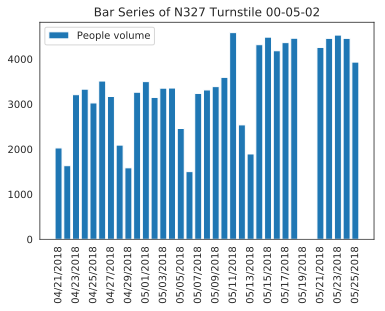

In [24]:
x = df_single_turnstile.DATE
y = df_single_turnstile.ENTRY_DIFF
plt.bar(x, y)
plt.xticks(range(0, len(x), 2), df_single_turnstile.DATE[::2], rotation=90)
plt.title('Bar Series of N327 Turnstile 00-05-02')
plt.legend(["People volume"])
plt.show()

# 0.0.1.5. Challenge 5

So far we've been operating on a single turnstile level,
    let's combine turnstiles in the same 
    ControlArea/Unit/Station combo. There are some 
    ControlArea/Unit/Station groups that have a single 
    turnstile, but most have multiple turnstilea-- same 
    value for the C/A, UNIT and STATION columns, different
    values for the SCP column.

We want to combine the numbers together -- for each 
ControlArea/UNIT/STATION combo, for each day, add the 
counts from each turnstile belonging to that combo.

In [25]:
df_mta['ID'] = df_mta['C/A'] + df_mta.UNIT + df_mta.STATION

In [26]:
df_chal5 = df_mta.groupby(by= ['ID', 'DATE']).sum().reset_index()
df_chal5.sample(6)

,ID,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF
9260,N133R38488 ST,05/09/2018,65261971,57080332,3113.00,1219.00
7626,N070R01234 ST-PENN STA,05/20/2018,1518883631,104992358,4935.00,6006.00
4823,H028R266HALSEY ST,05/19/2018,567672155,236123774,5550.00,1128.00
10870,N306R017LEXINGTON AV/53,05/09/2018,4882954149,3926118748,26556.00,24608.00
23057,R504R276VERNON-JACKSON,05/22/2018,192305074,43681170,9420.00,2628.00
25467,S101AR070ST. GEORGE,05/18/2018,609492999,464679,7184.00,19.00


# 0.0.1.6. Challenge 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [27]:
df_chal6 = df_mta.groupby(by= ['C/A', 'UNIT', 'STATION','ID', 'DATE']).sum().reset_index()
df_chal6['DATE']= pd.to_datetime(df_chal6['DATE'])

In [28]:
station_df = df_chal6.groupby(by=['STATION', 'DATE']).sum().reset_index()

# 0.0.1.7. Challenge 7

Plot the time series (either daily or your preferred level of granularity) for a station.

In [29]:
station_df.sample(5)

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF
7572,FOREST AVE,2018-05-10,82659824,75495025,3365.00,2757.00
4538,AVENUE P,2018-05-14,77856905,48375752,1386.00,152.00
10327,NEWARK BM BW,2018-05-08,19228837,1584115,16298.00,1265.00
1367,207 ST,2018-04-23,951228442,53073096,6893.00,3211.00
12956,WOODLAWN,2018-05-08,194881354,74646684,7970.00,1733.00


In [30]:
single_station = station_df[station_df['STATION'] == 'BROOKLYN BRIDGE']
single_station.head()

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF
5775,BROOKLYN BRIDGE,2018-04-21,12528371450,6660955898,10548.00,6868.00
5776,BROOKLYN BRIDGE,2018-04-22,12528414982,6660992911,8165.00,5027.00
5777,BROOKLYN BRIDGE,2018-04-23,12528469557,6661056516,22159.00,17453.00
5778,BROOKLYN BRIDGE,2018-04-24,12528577935,6661163355,22656.00,18114.00
5779,BROOKLYN BRIDGE,2018-04-25,12528686289,6661270681,20543.00,17457.00


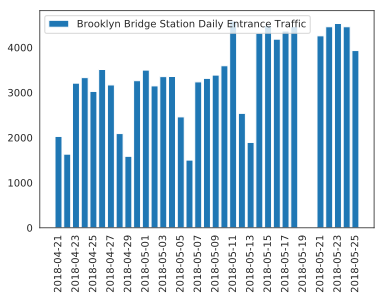

In [32]:
xvalues = single_station.DATE
yalues = single_station.ENTRY_DIFF
plt.bar(x,y)
plt.xticks(range(0, len(xvalues), 2), single_station.DATE.dt.date[::2], rotation=90)
plt.legend(["Brooklyn Bridge Station Daily Entrance Traffic"])
plt.show();

# 0.0.1.8. Challenge 8

Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.

To clarify: if I have 10 weeks of data on the 28th st 6 station, I will add 10 lines to the same figure (e.g. running plt.plot(week_count_list) once for each week). Each plot will have 7 points of data.

In [34]:
single_station.sample(8)

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF
5803,BROOKLYN BRIDGE,2018-05-19,3701831957,4000644124,6896.00,5278.00
5782,BROOKLYN BRIDGE,2018-04-28,10669381699,5653788803,10919.00,6235.00
5787,BROOKLYN BRIDGE,2018-05-03,2536153517,2708692045,23598.00,18911.00
5783,BROOKLYN BRIDGE,2018-04-29,4146559008,2716274908,7509.00,4749.00
5775,BROOKLYN BRIDGE,2018-04-21,12528371450,6660955898,10548.00,6868.00
5789,BROOKLYN BRIDGE,2018-05-05,1760414787,1180013565,9984.00,5845.00
5798,BROOKLYN BRIDGE,2018-05-14,3695474642,3993587858,22153.00,17606.00
5790,BROOKLYN BRIDGE,2018-05-06,3700350487,3999465238,6806.00,4012.00


In [39]:
single_station.loc[:, 'DATE'] = pd.to_datetime(single_station['DATE'])

/home/spencer/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
single_station['ENTRY_PER_WEEK'] = single_station.groupby(single_station.DATE.dt.week)

In [60]:
single_station.groupby(single_station.DATE.dt.dayofweek).sum()['ENTRY_DIFF']

DATE
0   109891.00
1   112664.00
2   110545.00
3   116764.00
4   102781.00
5    47271.00
6    37365.00
Name: ENTRY_DIFF, dtype: float64

I need individual plots. Each plot is for like Week 16, Days 0-6, daily counts. Then Week 17, Days 0-6, Daily counts

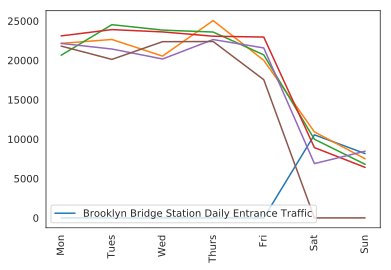

In [107]:
x1 = [0, 1, 2, 3, 4, 5, 6]

for i in single_station.DATE.dt.week.unique():
    y = []
    week = single_station[single_station['DATE'].dt.week == i]
    for j in range(0, 7):
        if j not in week.groupby(single_station.DATE.dt.dayofweek).sum().index:
            y.append(0)
        else:
            y.append(week
                 .groupby(single_station.DATE.dt.dayofweek)
                 .sum()
                 .loc[j, 'ENTRY_DIFF']
            )
    plt.plot(x1, y)
plt.xticks(x1, ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), rotation=90)
plt.legend(["Brooklyn Bridge Station Daily Entrance Traffic"], loc='lower left')
plt.show();

# 0.0.1.9. Challenge 9

    Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [108]:
station_df.head()

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF
0,1 AV,2018-04-21,18219059750,9746094636,20191.00,22462.00
1,1 AV,2018-04-22,18219176244,9746222573,15893.00,17071.00
2,1 AV,2018-04-23,15633342462,8562913857,21115.00,23339.00
3,1 AV,2018-04-24,18219407982,9746484176,21856.00,24878.00
4,1 AV,2018-04-25,18219542288,9746631826,23180.00,24343.00


In [113]:
station_df.groupby('STATION').sum().sort_values(by='ENTRY_DIFF', ascending=False).head()

,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF
STATION,,,,
34 ST-PENN STA,836670038638,618348880423,5051702.00,4318946.00
GRD CNTRL-42 ST,318262224954,451746730699,4458508.00,4104892.00
34 ST-HERALD SQ,1174610320720,1523461405213,3918220.00,3424525.00
23 ST,1401658466380,1554100403629,3681662.00,2660270.00
14 ST-UNION SQ,170311298981,61936787568,3393288.00,2921752.00


### It appears the top 3 stations by Entrances in my time table are Penn Station, Grand Central, then Herald Square

# 0.0.1.10. Challenge 10

    Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)

In [114]:
total_ridership_counts = station_df.groupby('STATION').sum().sort_values(by='ENTRY_DIFF', ascending=False).loc[:, 'ENTRY_DIFF']

(array([272.,  64.,  17.,   9.,   3.,   3.,   3.,   2.,   1.,   1.]),
 array([4.9160000e+03, 5.0959460e+05, 1.0142732e+06, 1.5189518e+06,
        2.0236304e+06, 2.5283090e+06, 3.0329876e+06, 3.5376662e+06,
        4.0423448e+06, 4.5470234e+06, 5.0517020e+06]),
 <a list of 10 Patch objects>)

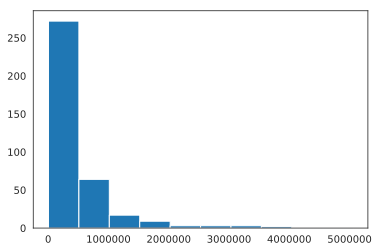

In [149]:
plt.hist(total_ridership_counts)
# plt.xlabels('Total Period Station Entry Traffic')
# plt.ylabel = 'Number of Stations'
# plt.show();

In [192]:
indices = range(len(total_ridership_values))
indices

range(0, 375)

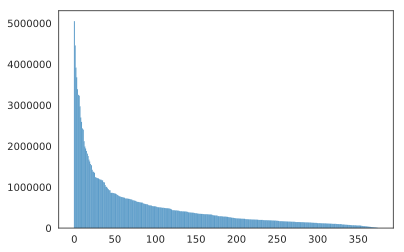

In [193]:
plt.bar(indices, total_ridership_counts, width=1, linewidth=0.1);